## PREDECIR PRECIO DE VIVIENDA EN BARRIOS DE BOSTON
Para ello utilizamos el dataset de **Boston Housing**:

1. **CRIM**: Tasa de criminalidad per cápita en la ciudad.
2. **ZN**: Proporción de terrenos residenciales con áreas superiores a 25,000 pies cuadrados.
3. **INDUS**: Proporción de hectáreas de negocios no minoristas en la ciudad.
4. **CHAS**: Variable indicadora del río Charles (1 si el tramo colinda con el río, 0 en caso contrario).
5. **NOX**: Concentración de óxidos de nitrógeno (partes por 10 millones).
6. **RM**: Promedio de habitaciones por vivienda.
7. **AGE**: Proporción de unidades ocupadas construidas antes de 1940.
8. **DIS**: Distancias ponderadas a cinco centros de empleo importantes de Boston.
9. **RAD**: Índice de accesibilidad a carreteras radiales.
10. **TAX**: Tasa de impuesto a la propiedad por cada 10,000 dólares.
11. **PTRATIO**: Proporción alumno-maestro por localidad.
12. **B**: 1000(Bk - 0.63)^2, donde Bk es la proporción de personas de raza afroamericana en la ciudad.
13. **LSTAT**: Porcentaje de población con un estatus socioeconómico bajo.
14. **MEDV**: Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares (variable objetivo).

El objetivo principal de este dataset es predecir la variable **MEDV** (precio medio de las viviendas) en función de las otras variables, que representan características demográficas, económicas y físicas de las áreas en Boston.

## explicación general de cómo se puede predecir el precio de una vivienda usando este enfoque.

### 1. **La ciencia detrás de la predicción**
El modelo se basa en la técnica de **regresión**. La regresión es un método de aprendizaje automático que busca encontrar relaciones entre las variables independientes (las características de las viviendas) y una variable dependiente (el precio). En este caso, estamos utilizando un modelo de regresión no lineal (Random Forest) que puede capturar relaciones complejas entre las variables.

- **Random Forest** divide los datos en múltiples árboles, cada uno basado en diferentes subconjuntos de las características y datos. 
- Cada árbol toma decisiones de forma secuencial para predecir el precio.
- Al final, se combinan las predicciones de todos los árboles para llegar a un resultado final, lo que generalmente mejora la precisión porque suaviza las posibles decisiones erróneas de cualquier árbol individual.

### 2. **Objetivo del código**
El objetivo del código es crear un modelo de aprendizaje automático que, utilizando las características de una vivienda (como la tasa de criminalidad en la zona, el número de habitaciones, la cercanía a una carretera, etc.), sea capaz de **predecir su precio**. Para hacerlo, el código entrena un modelo de regresión con un conjunto de datos históricos y luego permite ingresar nuevas características de una vivienda a través de una interfaz interactiva (widgets), para obtener una predicción del precio.

#### ¿Cómo funciona este proceso?

1. **Datos de entrada**: Usamos un dataset con datos históricos de viviendas en Boston, donde cada fila contiene diversas características de la vivienda (como el número de habitaciones, la tasa de criminalidad, el acceso a carreteras, etc.) y su precio (etiqueta). Este precio es la variable objetivo (lo que queremos predecir).
   
2. **Entrenamiento**: 
   - El dataset se divide en dos partes: datos de entrenamiento y datos de prueba. 
   - El modelo se entrena con los datos de entrenamiento, es decir, aprende a relacionar las características de las viviendas con sus precios.
   - Durante este proceso, el modelo construye muchos árboles de decisión. Un árbol de decisión es una estructura que divide los datos en ramas basadas en las características que son más útiles para predecir el precio.
   - El **Random Forest** construye múltiples árboles (un "bosque") y promedia las predicciones de todos ellos, lo que ayuda a reducir el riesgo de sobreajuste (cuando un modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien con datos nuevos).

3. **Evaluación**: Una vez entrenado, el modelo se prueba con los datos de prueba (que no ha visto durante el entrenamiento) para verificar su precisión. Esto garantiza que el modelo puede hacer buenas predicciones con datos nuevos.

4. **Predicción del precio**:Después de entrenar el modelo, se crea una interfaz interactiva para que el usuario pueda **introducir las características de una vivienda** (como la tasa de criminalidad, el número de habitaciones, la cercanía al río, etc.). Una vez que se introducen estos valores, se hace una **predicción del precio** utilizando el modelo entrenado.

### Conclusión
Este código usa el poder de los algoritmos de aprendizaje automático, en particular Random Forest, para hacer predicciones complejas basadas en datos históricos. El modelo predice el precio de una vivienda considerando varios factores interrelacionados, ayudando a capturar el impacto conjunto de variables como la ubicación, la calidad de la vivienda y la infraestructura local, entre otros.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que los gráficos se muestren en la notebook
%matplotlib inline

# Importar modelos y métricas para regresión
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Cargar el dataset (si es que no lo has hecho aún)
df = pd.read_csv('HousingData.csv')

# Reemplazar o eliminar valores faltantes (ejemplo: eliminar filas con NaN)
df = df.dropna()

# Dividir datos en características (X) y etiqueta (y)
X = df.drop("MEDV", axis=1)  # MEDV es el precio de la vivienda (variable dependiente)
y = df["MEDV"]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar un modelo (por ejemplo, regresión lineal)
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [2]:
df.shape # (rows, columns)

(394, 14)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


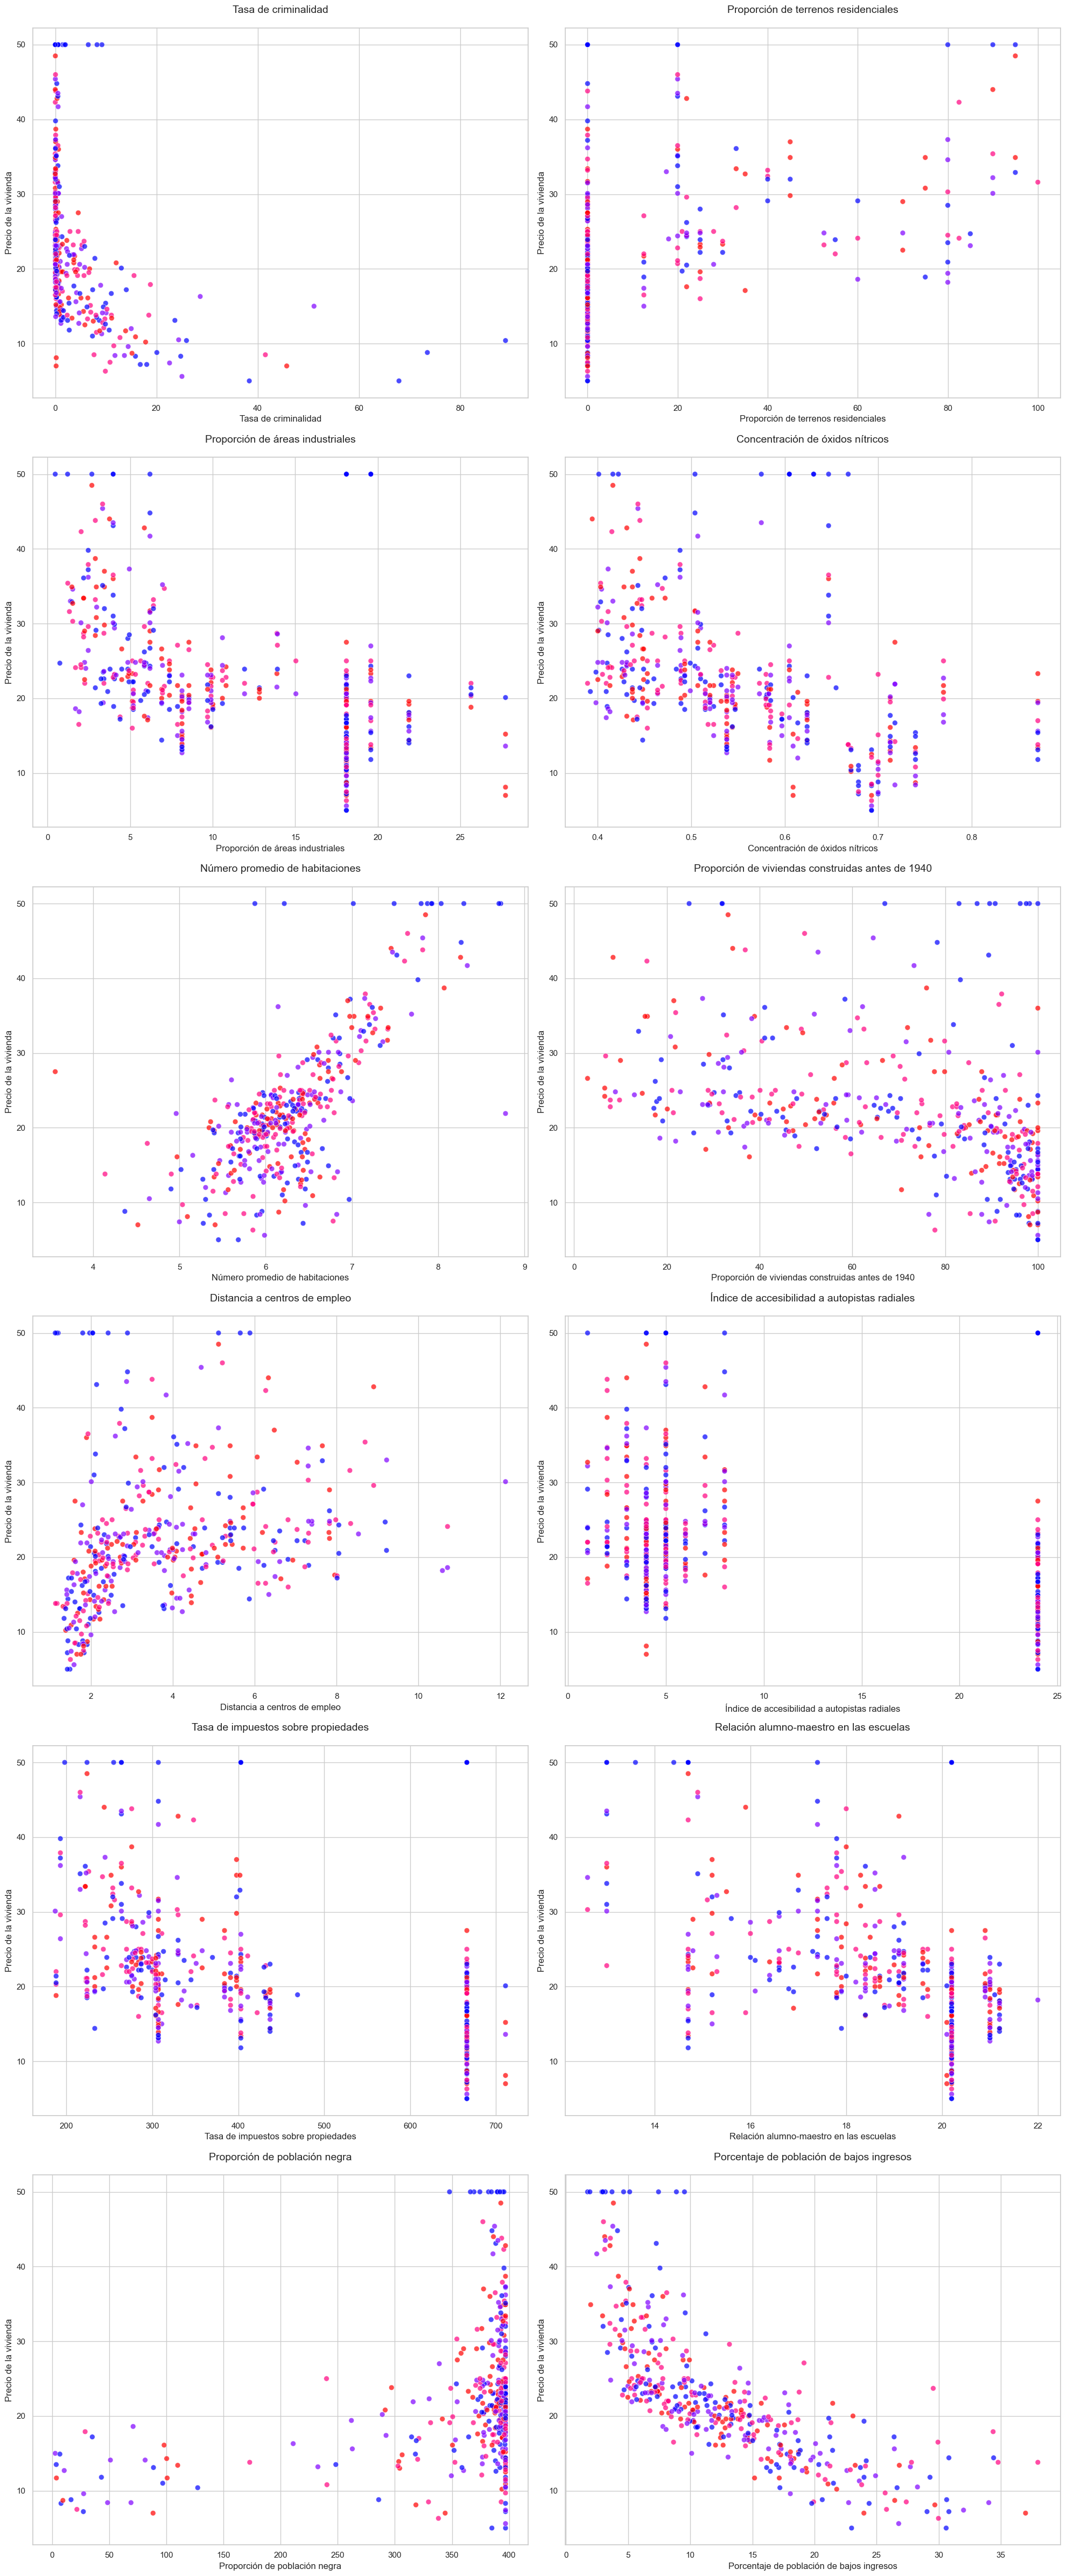

In [7]:
import warnings  # Importar el módulo warnings

# Ignorar warnings
warnings.filterwarnings("ignore")

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con 4 filas y 3 columnas
fig, axs = plt.subplots(6, 2, figsize=(20, 48))  # Aumentamos la altura de la figura

# Aplanar los ejes para fácil iteración
axs = axs.flatten()

# Lista de características a graficar y sus nombres en español
features = [
    ('CRIM', 'Tasa de criminalidad'),
    ('ZN', 'Proporción de terrenos residenciales'),
    ('INDUS', 'Proporción de áreas industriales'),
    ('NOX', 'Concentración de óxidos nítricos'),
    ('RM', 'Número promedio de habitaciones'),
    ('AGE', 'Proporción de viviendas construidas antes de 1940'),
    ('DIS', 'Distancia a centros de empleo'),
    ('RAD', 'Índice de accesibilidad a autopistas radiales'),
    ('TAX', 'Tasa de impuestos sobre propiedades'),
    ('PTRATIO', 'Relación alumno-maestro en las escuelas'),
    ('B', 'Proporción de población negra'),
    ('LSTAT', 'Porcentaje de población de bajos ingresos')
]

# Crear un nuevo color mapa de azul puro a rojo
cmap = sns.color_palette(["#0000FF", "#7F00FF", "#FF007F", "#FF0000"], as_cmap=True)

# Crear gráficos de dispersión
for i, (feature, nombre) in enumerate(features):
    if i < len(axs):  # Comprobar si el índice está dentro de los límites
        # Graficar el scatter plot con color basado en el precio
        sns.scatterplot(data=df, x=feature, y='MEDV', ax=axs[i], 
                        hue='MEDV', palette=cmap, legend=False, 
                        marker='o', s=50, alpha=0.7)

        # Configurar título y etiquetas
        axs[i].set_title(f'{nombre}', fontsize=14, pad=20)
        axs[i].set_xlabel(nombre, fontsize=12)
        axs[i].set_ylabel('Precio de la vivienda', fontsize=12)

# Ajustar el espacio entre gráficos, aumentando el espacio vertical
plt.subplots_adjust(hspace=3.0)  # Mayor separación vertical
plt.tight_layout()
plt.show()


In [5]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Usaremos Random Forest para predecir

# Asumimos que ya tienes el dataset cargado como df
# df = pd.read_csv('ruta/dataset.csv')

# Eliminamos NaN y dividimos los datos
df = df.dropna()

X = df.drop("MEDV", axis=1)  # Características (todo menos el precio)
y = df["MEDV"]  # Etiqueta (precio de la vivienda)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Descripciones y widgets
descripcion_crim = widgets.HTML(value="<b>Tasa de criminalidad (CRIM)</b>: Tasa per cápita de criminalidad. <i>Valor normal: 0.1</i>")
crim_widget = widgets.FloatSlider(
    value=0.1, min=0.0, max=100.0, step=0.01, 
    description='Tasa criminalidad:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

descripcion_zn = widgets.HTML(value="<b>Porcentaje de zona residencial (ZN)</b>: Porcentaje de terrenos residenciales con lotes grandes. <i>Valor normal: 12.5%</i>")
zn_widget = widgets.FloatSlider(
    value=0.0, min=0.0, max=100.0, step=0.1, 
    description='Porc. zona residencial:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

descripcion_indus = widgets.HTML(value="<b>Proporción de zona industrial (INDUS)</b>: Porcentaje de terrenos no minoristas. <i>Valor normal: 11%</i>")
indus_widget = widgets.FloatSlider(
    value=0.0, min=0.0, max=30.0, step=0.1, 
    description='Porc. zona industrial:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

descripcion_chas = widgets.HTML(value="<b>Cercanía al Río Charles (CHAS)</b>: 1 si está cerca del río, 0 si no. <i>Valor normal: 0</i>")
chas_widget = widgets.ToggleButtons(
    options=[0, 1], 
    description='Cerca del Río Charles:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

descripcion_nox = widgets.HTML(value="<b>Concentración de óxidos de nitrógeno (NOX)</b>: Nivel de contaminación. <i>Valor normal: 0.5</i>")
nox_widget = widgets.FloatSlider(
    value=0.5, min=0.0, max=1.0, step=0.01, 
    description='Contaminación (NOX):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

descripcion_rm = widgets.HTML(value="<b>Número promedio de habitaciones (RM)</b>: Número promedio de habitaciones por vivienda. <i>Valor normal: 6</i>")
rm_widget = widgets.FloatSlider(
    value=6.0, min=3.0, max=9.0, step=0.1, 
    description='Número de habitaciones:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

descripcion_age = widgets.HTML(value="<b>Proporción de viviendas antiguas (AGE)</b>: Porcentaje de viviendas construidas antes de 1940. <i>Valor normal: 68%</i>")
age_widget = widgets.FloatSlider(
    value=50.0, min=0.0, max=100.0, step=0.1, 
    description='% construcciones antiguas:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

descripcion_dis = widgets.HTML(value="<b>Distancia a centros de empleo (DIS)</b>: Distancia ponderada a los centros de empleo. <i>Valor normal: 3.8</i>")
dis_widget = widgets.FloatSlider(
    value=5.0, min=1.0, max=12.0, step=0.1, 
    description='Distancia a centros empleo:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

descripcion_rad = widgets.HTML(value="<b>Acceso a carreteras (RAD)</b>: Índice de accesibilidad a carreteras radiales. <i>Valor normal: 9</i>")
rad_widget = widgets.IntSlider(
    value=1, min=1, max=24, 
    description='Acceso a carreteras (RAD):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

descripcion_tax = widgets.HTML(value="<b>Impuesto a la propiedad (TAX)</b>: Impuesto a la propiedad por cada 10,000 dólares. <i>Valor normal: 300</i>")
tax_widget = widgets.IntSlider(
    value=200, min=100, max=800, 
    description='Impuesto a la propiedad (TAX):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

descripcion_ptratio = widgets.HTML(value="<b>Relación alumno/profesor (PTRATIO)</b>: Proporción de alumnos por maestro. <i>Valor normal: 18</i>")
ptratio_widget = widgets.FloatSlider(
    value=15.0, min=10.0, max=25.0, step=0.1, 
    description='Relación alumno/profesor:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

descripcion_b = widgets.HTML(value="<b>Proporción de personas afroamericanas (B)</b>: Proporción de la población afroamericana. <i>Valor normal: 392</i>")
b_widget = widgets.FloatSlider(
    value=380.0, min=0.0, max=400.0, step=1.0, 
    description='Proporción afroamericana (B):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

descripcion_lstat = widgets.HTML(value="<b>% de población de clase baja (LSTAT)</b>: Porcentaje de población con estatus socioeconómico bajo. <i>Valor normal: 12%</i>")
lstat_widget = widgets.FloatSlider(
    value=10.0, min=0.0, max=40.0, step=0.1, 
    description='% clase baja (LSTAT):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

# Botón para predecir
predecir_button = widgets.Button(description="Predecir Precio")

# Output para mostrar los resultados
output = widgets.Output()

# Función para hacer la predicción
def predecir_precio(b):
    # Crear un DataFrame con los datos de la vivienda
    datos_vivienda = pd.DataFrame([[
        crim_widget.value,
        zn_widget.value,
        indus_widget.value,
        chas_widget.value,
        nox_widget.value,
        rm_widget.value,
        age_widget.value,
        dis_widget.value,
        rad_widget.value,
        tax_widget.value,
        ptratio_widget.value,
        b_widget.value,
        lstat_widget.value
    ]], columns=X.columns)

    # Hacer la predicción con el modelo
    prediccion = model.predict(datos_vivienda)

    # Mostrar el resultado en el output
    with output:
        output.clear_output()
        print(f"El precio predicho para la vivienda es: {prediccion[0]:.2f} miles de dólares")

# Conectar el botón a la función
predecir_button.on_click(predecir_precio)

# Mostrar los widgets y el botón, con las descripciones arriba
display(
    descripcion_crim, crim_widget,
    descripcion_zn, zn_widget,
    descripcion_indus, indus_widget,
    descripcion_chas, chas_widget,
    descripcion_nox, nox_widget,
    descripcion_rm, rm_widget,
    descripcion_age, age_widget,
    descripcion_dis, dis_widget,
    descripcion_rad, rad_widget,
    descripcion_tax, tax_widget,
    descripcion_ptratio, ptratio_widget,
    descripcion_b, b_widget,
    descripcion_lstat, lstat_widget,
    predecir_button, output
)


HTML(value='<b>Tasa de criminalidad (CRIM)</b>: Tasa per cápita de criminalidad. <i>Valor normal: 0.1</i>')

FloatSlider(value=0.1, description='Tasa criminalidad:', layout=Layout(width='500px'), step=0.01, style=Slider…

HTML(value='<b>Porcentaje de zona residencial (ZN)</b>: Porcentaje de terrenos residenciales con lotes grandes…

FloatSlider(value=0.0, description='Porc. zona residencial:', layout=Layout(width='500px'), style=SliderStyle(…

HTML(value='<b>Proporción de zona industrial (INDUS)</b>: Porcentaje de terrenos no minoristas. <i>Valor norma…

FloatSlider(value=0.0, description='Porc. zona industrial:', layout=Layout(width='500px'), max=30.0, style=Sli…

HTML(value='<b>Cercanía al Río Charles (CHAS)</b>: 1 si está cerca del río, 0 si no. <i>Valor normal: 0</i>')

ToggleButtons(description='Cerca del Río Charles:', layout=Layout(width='500px'), options=(0, 1), style=Toggle…

HTML(value='<b>Concentración de óxidos de nitrógeno (NOX)</b>: Nivel de contaminación. <i>Valor normal: 0.5</i…

FloatSlider(value=0.5, description='Contaminación (NOX):', layout=Layout(width='500px'), max=1.0, step=0.01, s…

HTML(value='<b>Número promedio de habitaciones (RM)</b>: Número promedio de habitaciones por vivienda. <i>Valo…

FloatSlider(value=6.0, description='Número de habitaciones:', layout=Layout(width='500px'), max=9.0, min=3.0, …

HTML(value='<b>Proporción de viviendas antiguas (AGE)</b>: Porcentaje de viviendas construidas antes de 1940. …

FloatSlider(value=50.0, description='% construcciones antiguas:', layout=Layout(width='500px'), style=SliderSt…

HTML(value='<b>Distancia a centros de empleo (DIS)</b>: Distancia ponderada a los centros de empleo. <i>Valor …

FloatSlider(value=5.0, description='Distancia a centros empleo:', layout=Layout(width='500px'), max=12.0, min=…

HTML(value='<b>Acceso a carreteras (RAD)</b>: Índice de accesibilidad a carreteras radiales. <i>Valor normal: …

IntSlider(value=1, description='Acceso a carreteras (RAD):', layout=Layout(width='500px'), max=24, min=1, styl…

HTML(value='<b>Impuesto a la propiedad (TAX)</b>: Impuesto a la propiedad por cada 10,000 dólares. <i>Valor no…

IntSlider(value=200, description='Impuesto a la propiedad (TAX):', layout=Layout(width='500px'), max=800, min=…

HTML(value='<b>Relación alumno/profesor (PTRATIO)</b>: Proporción de alumnos por maestro. <i>Valor normal: 18<…

FloatSlider(value=15.0, description='Relación alumno/profesor:', layout=Layout(width='500px'), max=25.0, min=1…

HTML(value='<b>Proporción de personas afroamericanas (B)</b>: Proporción de la población afroamericana. <i>Val…

FloatSlider(value=380.0, description='Proporción afroamericana (B):', layout=Layout(width='500px'), max=400.0,…

HTML(value='<b>% de población de clase baja (LSTAT)</b>: Porcentaje de población con estatus socioeconómico ba…

FloatSlider(value=10.0, description='% clase baja (LSTAT):', layout=Layout(width='500px'), max=40.0, style=Sli…

Button(description='Predecir Precio', style=ButtonStyle())

Output()